# <div align='center'> Основные виды распределения случайной величины </div>

<div align='center'> <b><big> Преподаватель: Маргарян Ашот Араратович </big> </b> </div>

<div align='center'> <b><i> Центральный университет, Москва </i> </b> </div>

<div align='center'> <i> Открытый урок, 04 июля 2025 г. </i> </div>

# Материалы занятия

Материалы этого занятия доступны по следующему QR-коду

<a href="http://qrcoder.ru" target="_blank"><img src="http://qrcoder.ru/code/?https%3A%2F%2Fgithub.com%2Fmarashot96%2FLections%2Fblob%2Fmain%2FD%26D%2FNavigator.md%23-%EE%F1%ED%EE%E2%ED%FB%E5-%F0%E0%F1%EF%F0%E5%E4%E5%EB%E5%ED%E8%FF-%F1%EB%F3%F7%E0%E9%ED%FB%F5-%E2%E5%EB%E8%F7%E8%ED-&6&0" width="342" height="342" border="0" title="QR код"></a>

---

# План урока

- **Дискретное и непрерывное распределение** случайной величины;
- Задача на **нормальное распределение**;
- Задача на **равномерное распределение**;
- Задачи на **распределение Бернулли** и **биномиальное распределение**;
- Задача на **распределение Пуассона**;
- Задача на **экспоненциальное распределение**.

---

# Используемые библиотеки Python

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#import matplotlib.gridspec as gridspec
#import warnings
#warnings.filterwarnings('ignore')

В рамках данного урока мы познакомимся с модулем `scipy.stats`, в котором есть как дискретные так и непрерывные распределения.

Полный их перечень хранится [тут](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions).

При вызове соответствующего метода респределения с основными параметрами создается генератор над которым можно выполнять операции.

---

# Нормальное распределение

**Нормальное распределение** — это «эталонное» **непрерывное** распределение, и с ним мы в курсе статистики ещё неоднократно встретимся.

$X$ распределено нормально:
$$f_{norm}(X) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

$\mu$ (математическое ожидание) и $\sigma$ (стандартное отклонение) — параметры нормального распределения, которые контролируют его форму и высоту.

Если параметры принимают значения по умолчанию $\mu = 0, \sigma = 1$, тогда получаем *нормальное стандартное распределение*.

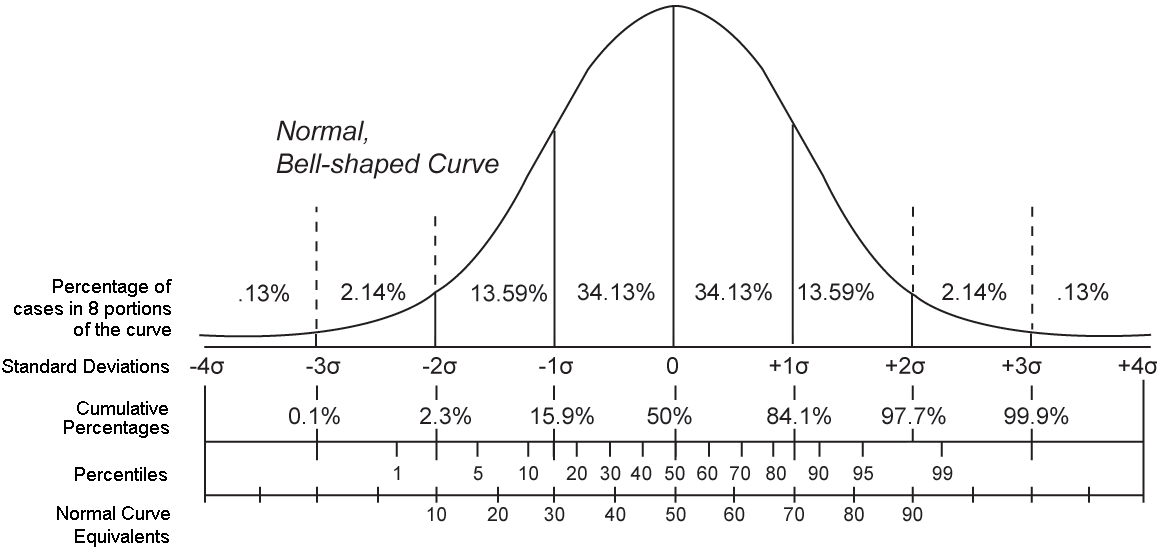


**Нормальное распределение в реальной жизни**

* Физические параметры человека (рост, вес)
* Выручка магазина
* Голосование на избирательных участках

In [4]:
from scipy.stats import norm

# Пример - Стандартное нормальное распределение
mu, sd = 10, 7
norm_rv = norm(loc=mu, scale=sd)

print(norm_rv)
print(type(norm_rv))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


**Основные методы генератора:**

* **rvs** - сгенерирует выборку из распределения объема `size` (*random variable sample*)
* **pdf** - вычисляет значение плотности распределения (*probabillity density function*) в указанной точке
* **cdf** - вычисляет значение функции распределения (*cumulative distribution function*) в указанной точке, т.е. $P(X \le x)$
* **pmf** - вычисляет значение функции вероятности (*probability mass function*) в указанной точке, т.е. $P(X = x)$. Только для дискретных распределений
* **ppf** - вычисляет квантиль указанного уровня (*percent point function*), т.е. возвращает значение соответствующее определенной вероятности. Обратная функция для **cdf**

In [7]:
# Пример создания выборки
samples = norm_rv.rvs(size=100)
pdf_x = norm_rv.pdf(10)
print(type(samples))
print(len(samples))
print(samples[:5], pdf_x)

<class 'numpy.ndarray'>
100
[ 2.65306594 17.21753672  0.72499012  3.198729    7.06286257] 0.056991754343061814


Посмотрим на практических задачах, как вышеуказанные методы работают.

### Задача 1. Вероятность оказаться ниже значения

Допустим, рост всех взрослых людей распределён нормально с $\mu = 178$ и $\sigma = 13$.

Какова вероятность, что случайно выбранный взрослый человек будет ниже $150$ см?

In [5]:
mu = 178
sigma = 13

**Решение**

Рассчитаем значение функции распределения нормального распределения с соответствующими параметрами в точке 150.

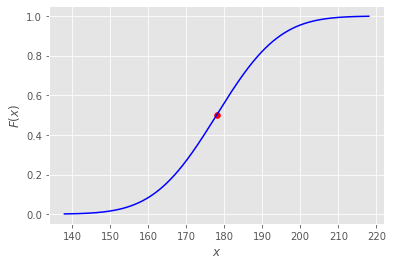

In [6]:
from scipy.stats import norm
rv = norm(mu, sigma)

# Создадим вектор X и вектор Y
x = np.linspace(138, 218, 1000)
cdf = rv.cdf(x)

# Посмотрим на график функции распределения
plt.plot(x, cdf, color='blue')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

# Нанесем проверим на среднем значении
norm_cdf_up_to_mu = rv.cdf(mu)
plt.scatter([mu], [norm_cdf_up_to_mu], color='red')
plt.show()

Проверим работу методов cdf и ppf на точке mu

In [7]:
print(rv.cdf(mu))
print(rv.ppf(0.5))

0.5
178.0


Чтобы рассчитать вероятность оказаться в точке меньше 150, необходимо рассчитать значение функции распределения (т.е. кумулятивной функции плотности) в точке 150.

In [8]:
rv.cdf(150)

0.015626119428469396

### Задача 2. Вероятность оказаться в интервале
Какова вероятность, что случайно выбранный взрослый человек ростом будет между 160 и 190?

**Решение**

*Переведём задачу на математический язык:*

$$P(160 < X < 190)= \int_{160}^{190}f(x)dx = F(190) - F(160)$$

Рассчитаем вероятность как разницу двух значений метода *cdf* в разных точках.

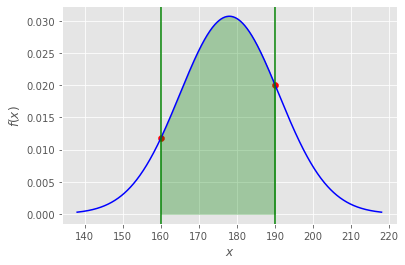

P(160 < X < 190) = 0.7389313877916964


In [9]:
pdf = rv.pdf(x)

plt.plot(x, pdf, color='blue')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# Нанесем точки на плотность распределения
plt.scatter([160, 190], [rv.pdf(160), rv.pdf(190)], color='red')

xq = np.linspace(160, 190)
yq = rv.pdf(xq)
plt.fill_between(xq, yq, color='green', alpha=0.3)
plt.axvline(160, color='green', lw=1.5)
plt.axvline(190, color='green', lw=1.5)
plt.show()

print(f'P(160 < X < 190) = {rv.cdf(190) - rv.cdf(160)}')

### Задача 3. Обратная задача

Решим обратную задачу. Зная вероятность $\gamma=0.05$, найдем квантиль $q$ такой, что $P(X \le q)=\gamma$

156.61690284963086 178.0
P(X <= 156.62) = 0.05


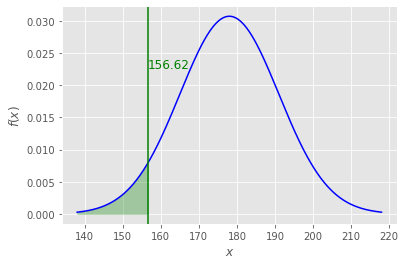

In [10]:
q = rv.ppf(0.05)
meadian = rv.ppf(0.5)

print(q, meadian)

x = np.linspace(138, 218, 1000)
pdf = rv.pdf(x)

plt.plot(x, pdf, color='blue')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


xq = np.linspace(138, q)
yq = rv.pdf(xq)
plt.fill_between(xq, yq, color='green', alpha=0.3)
plt.axvline(q, color='green', lw=1.5)

y_max = plt.ylim()[1]
plt.text(q-0.1, 0.7*y_max, round(q,2), color='green', fontsize=12)

print(f'P(X <= {round(q, 2)}) = 0.05')

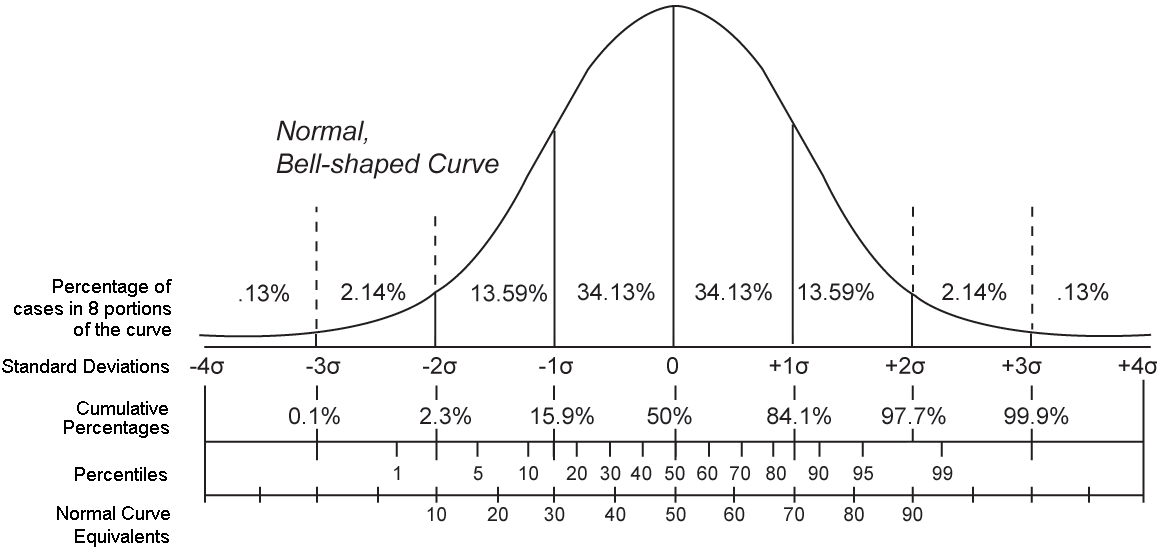

**Рассмотрим пример с клиентскими платежами**

In [11]:
import pandas as pd

df = pd.read_excel('https://drive.google.com/uc?export=download&id=1iefV9k7nluQBBWi6w91BwUybqnIYnyQQ')
df.head()

,id_purch,amt
0,103740.0,441.0
1,105277.0,615.0
2,101943.0,621.0
3,103392.0,639.0
4,106193.0,675.0


In [12]:
mu_sample = df['amt'].mean()
sigma_sample = df['amt'].std()

print("Среднее выборки = ", mu_sample)
print("Стандартное отклонение выборки = ", sigma_sample)

Среднее выборки =  1793.4910830795998
Стандартное отклонение выборки =  398.64210691121434


In [13]:
cnt_1_sigma = len(df[(df['amt'] >= mu_sample - sigma_sample) & (df['amt'] <= mu_sample + sigma_sample)])
cnt_2_sigma = len(df[(df['amt'] >= mu_sample - 2 * sigma_sample) & (df['amt'] <= mu_sample + 2 * sigma_sample)])
cnt_3_sigma = len(df[(df['amt'] >= mu_sample - 3 * sigma_sample) & (df['amt'] <= mu_sample + 3 * sigma_sample)])
cnt_all = len(df)

share_1_sigma = cnt_1_sigma / cnt_all
share_2_sigma = cnt_2_sigma / cnt_all
share_3_sigma = cnt_3_sigma / cnt_all

print("В интервале 1 сигмы находится ", share_1_sigma, "% выборки")
print("В интервале 2 сигм находится ", share_2_sigma, "% выборки")
print("В интервале 3 сигм находится ", share_3_sigma, "% выборки")

В интервале 1 сигмы находится  0.6824706394084384 % выборки
В интервале 2 сигм находится  0.9569377990430622 % выборки
В интервале 3 сигм находится  0.998260113092649 % выборки


In [14]:
share_1_sigma_norm = .683
share_2_sigma_norm = .954
share_3_sigma_norm = .997

threshold = .01

print(abs(share_1_sigma_norm - share_1_sigma))
print(abs(share_1_sigma_norm - share_1_sigma) < threshold)
print()
print(abs(share_2_sigma_norm - share_2_sigma))
print(abs(share_2_sigma_norm - share_2_sigma) < threshold)
print()
print(abs(share_3_sigma_norm - share_3_sigma))
print(abs(share_3_sigma_norm - share_3_sigma) < threshold)

print('')


0.0005293605915616117
True

0.002937799043062239
True

0.0012601130926489512
True



**Вывод**

Можем признать распределение нормальным исходя из установленного порога.

### Задача 4. Пример смещённого нормального распределения

С помощью метода *skewnorm* можно сгенерировать выборку *асимметричного нормального распределения* и при этом задать *параметр смещения*

In [12]:
from scipy.stats import skewnorm, mode

def skewed_discrete_normal(mu, sigma, skewness, size):
    samples = skewnorm.rvs(a=skewness, loc=mu, scale=sigma, size=size)
    samples = np.floor(samples)
    return samples

mu = 10
sigma = 2
skewness1 = 5
skewness2 = -5
size = 50000

Median = 11.0
Mode = [10.]
Mean = 11.06194


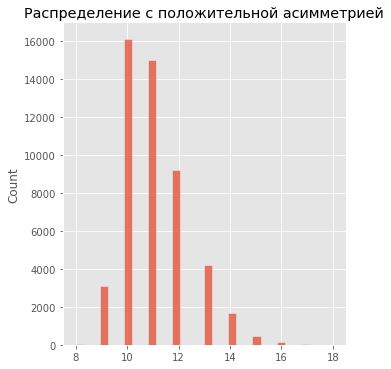

In [13]:
samples_l = skewed_discrete_normal(mu, sigma, skewness1, size)
sns.displot(samples_l, bins=32)
plt.title("Распределение с положительной асимметрией")
print(f'Median = {np.median(samples_l)}')
print(f'Mode = {mode(samples_l)[0]}')
print(f'Mean = {np.mean(samples_l)}')

Median = 8.0
Mode = [9.]
Mean = 7.92906


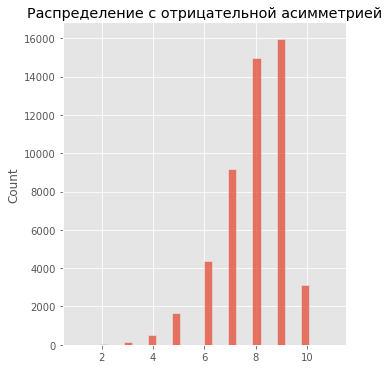

In [14]:
samples_l = skewed_discrete_normal(mu, sigma, skewness2, size)
sns.displot(samples_l, bins=32)
plt.title("Распределение с отрицательной асимметрией")
print(f'Median = {np.median(samples_l)}')
print(f'Mode = {mode(samples_l)[0]}')
print(f'Mean = {np.mean(samples_l)}')

Median = 9.0
Mode = [10.]
Mean = 9.48596


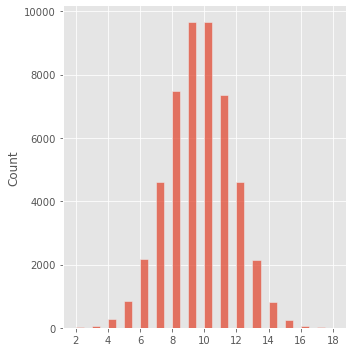

In [15]:
samples_n = np.floor(norm(mu, sigma).rvs(size))
sns.displot(samples_n, bins=32)
print(f'Median = {np.median(samples_n)}')
print(f'Mode = {mode(samples_n)[0]}')
print(f'Mean = {np.mean(samples_n)}')

Изобразим положительное и отрицательное смещение на одном графике.

Median_1 = 11.0,   Median_2 = 8.0
Mode_1 = [10.],     Mode_2 = [9.],
Mean_1 = 11.05686, Mean_2 = 7.93574


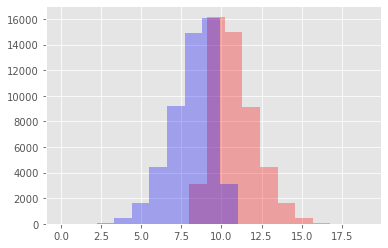

In [19]:
samples_r1 = skewed_discrete_normal(mu, sigma, skewness1, size)
samples_r2 = skewed_discrete_normal(mu, sigma, skewness2, size)

plt.hist(samples_r1, alpha = .3, color = 'red')
plt.hist(samples_r2, alpha = .3, color = 'blue')

print(f'Median_1 = {np.median(samples_r1)},   Median_2 = {np.median(samples_r2)}')
print(f'Mode_1 = {mode(samples_r1)[0]},     Mode_2 = {mode(samples_r2)[0]},')
print(f'Mean_1 = {np.mean(samples_r1)}, Mean_2 = {np.mean(samples_r2)}')

## Равномерное распределение

**Определение**

Непрерывное распределение называется нормальным, если плотность распределения $f(x)$ задана следующим соотношением:


\begin{cases}
\displaystyle \frac{1}{b - a}, & a \leq x \leq b, \\
\\
\hspace{0.5 cm}  0, & x<a, \hspace{0.5 cm} x>b.
\end{cases}


**Равномерное распределение в реальной жизни**

* Угадывание действительного числа от n до m
* Вероятность выпадения грани кубика
* Вероятность вытащить карту определенной масти.

**Характеристики равномерного распределения**

| M(X) | D(X) | $\sigma X$ |
| ---- | ---- | --------- |
| $\frac{a+b}2$ |           |

In [20]:
a = 0
b = 6

mu_x = (a + b) / 2
print(mu_x)

sigma_x = ((b - a)**2 / 12) ** .5
print(sigma_x)

3.0
1.7320508075688772


Как рассчитать функцию плотности?

Очень просто:\
$$f(x) = \frac{1}{b-a}, x \in [a, b]$$

В нашем случае функция плотности — это прямоугольник со сторонами 6 и $\frac{1}{6}$. Таким образом, площадь прямоугольника равна единице.

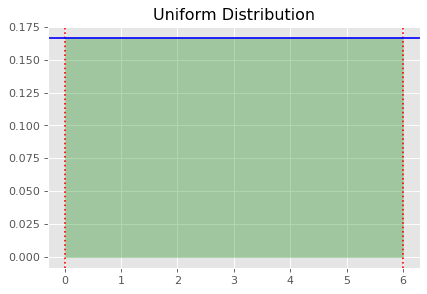

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=80)
plt.axvline(0, color = 'red', linestyle='dotted')
plt.axvline(6, color = 'red', linestyle='dotted')
plt.axhline(1/6, color = 'blue')
plt.title("Uniform Distribution")
plt.fill_between([0, 6], 1 / 6, alpha = .3, color = 'green')

plt.show()

### Задача 1. Игра в кости

Вы подбрасываете игровую кость с потенциальными исходами от $1$ до $6$.

Какова вероятность получить значение между $2$ и $4$?

In [22]:
from scipy.stats import uniform

a = 0
b = 6
rv = uniform(a,b)

Сначала рассчитаем вероятность получить значение меньше $2$.

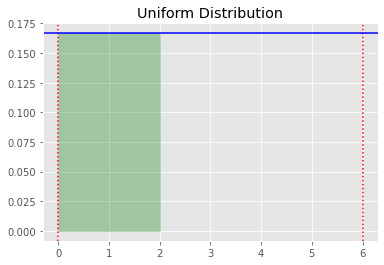

0.3333333333333333


In [23]:
cdf_2 = rv.cdf(2)

plt.axvline(0, color = 'red', linestyle='dotted')
plt.axvline(6, color = 'red', linestyle='dotted')
plt.axhline(1/6, color = 'blue')
plt.title("Uniform Distribution")
plt.fill_between([0, 2], 1 / 6, alpha = .3, color = 'green')

plt.show()
print(cdf_2)

Затем рассчитаем вероятность получить значение меньше $4$.

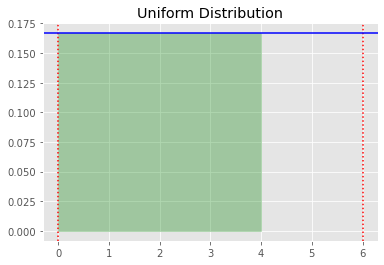

0.6666666666666666


In [24]:
cdf_4 = rv.cdf(4)

plt.axvline(0, color = 'red', linestyle='dotted')
plt.axvline(6, color = 'red', linestyle='dotted')
plt.axhline(1/6, color = 'blue')
plt.title("Uniform Distribution")
plt.fill_between([0, 4], 1 / 6, alpha = .3, color = 'green')

plt.show()
print(cdf_4)

Теперь из одной вероятности вычтем другую

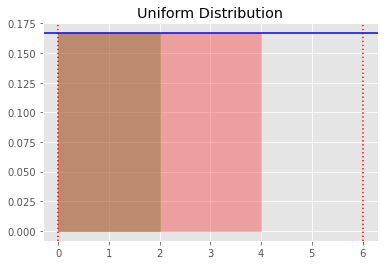

0.3333333333333333


In [25]:
plt.axvline(0, color = 'red', linestyle='dotted')
plt.axvline(6, color = 'red', linestyle='dotted')
plt.axhline(1/6, color = 'blue')
plt.title("Uniform Distribution")
plt.fill_between([0, 2], 1 / 6, alpha = .3, color = 'green')
plt.fill_between([0, 4], 1 / 6, alpha = .3, color = 'red')

plt.show()
print(cdf_4 - cdf_2)

**Ответ:** $0.(3)$

### Задача 2. Выплаты ассистентам

В онлайн-университете Х домашние задания проверяют ассистенты. Стоимость проверки одного домашнего задания с учётом налогов варьируется в зависимости от грейда асистента, предмета и сложности домашнего задания, поэтому практически каждый раз она получается разной.

Онлайн-университет Х перешёл на автоматизированную систему платежей, однако из-за технической ошибки вся копеечная часть отвалилась из оплаты за каждое домашнее задание. То есть произошло округление вниз до рублей.

При условии равномерности распределения копеечных остатков, постройте функцию распределения потерь одного асистента за месяц.

Параметризуйте данное вычисление с помощью количества проверок в месяц.

**Решение:**

Зададим левую и правую границу копеечного отстатка

In [26]:
a = 0
b = 99

Нетрудно рассчитать мат.ожидание и дисперсию по формулам

In [27]:
mu_x = (a + b) / 2
print(mu_x)

sigma_x = ((b - a)**2 / 12) ** .5
print(sigma_x)

49.5
28.578838324886476


Теперь построим функцию плотности копеечных остатков

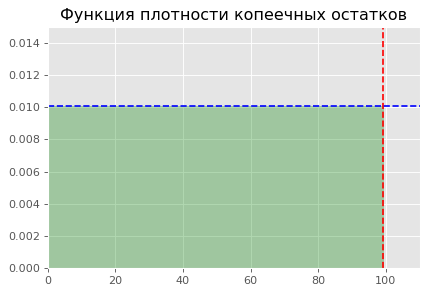

In [28]:
plt.figure(figsize=(6, 4), dpi=80)
plt.axvline(a, color = 'red', linestyle='--')
plt.axvline(b, color = 'red', linestyle='--')
plt.axhline(1 / (b - a), color = 'blue', linestyle='--' )
plt.title("Функция плотности копеечных остатков")
plt.fill_between([a, b], 1 / (b - a), alpha = .3, color = 'green')
plt.xlim([0, 110])
plt.ylim([0, 0.015])
plt.show()

Теперь построим функцию распределения копеечных остатков

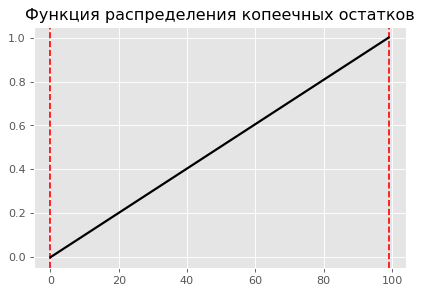

In [29]:
a, b = 0, 99
size = 100

plt.figure(figsize=(6, 4), dpi=80)
uniform_distribution = uniform(loc=a, scale=b)
x = np.linspace(uniform_distribution.ppf(0), uniform_distribution.ppf(1), size)
plt.axvline(a, color = 'red', linestyle='--')
plt.axvline(b, color = 'red', linestyle='--')

cdf = uniform_distribution.cdf(x)
plt.plot(x, cdf, 'k-', lw=2, label='cdf')
plt.title("Функция распределения копеечных остатков")
plt.show()

In [30]:
def count_loss_rub(N, mu_x):

  exp = mu_x / 100

  return N*exp

In [31]:
count_loss_rub(100, mu_x)

49.5

### Задача 3. Длительность просмотра сериала

Вы заходите в свой любимый онлайн-кинотеатр в пятницу вечером и видите, что вышел новый сериал, который вы давно ждали.

Исходя из имеющейся статистики по количеству сезонов в сериале, количеству серий в сезоне и длительности серии, определите успеете ли вы посмотреть этот сериал за выходные?


In [32]:
df = pd.read_excel('https://drive.google.com/uc?export=download&id=1bwn6MfPxUMIJpbUdphQw-LBCPci85uon')

df.head(3)

,id_title_series,season_num,episode_num,len_min
0,223412.0,1.0,31.0,90.0
1,223412.0,2.0,21.0,90.0
2,223412.0,3.0,11.0,90.0


Для начала найдём, в каком сериале в каком сезоне сколько серий.

In [33]:
df_by_season = df.groupby(['id_title_series','season_num']).agg(cnt_eps=('episode_num','max')).reset_index()

df_by_season.head(3)

,id_title_series,season_num,cnt_eps
0,113114.0,1.0,10.0
1,113114.0,2.0,10.0
2,113115.0,1.0,10.0


Теперь усредним количество серий в сезоне для каждого сериала.

In [34]:
df_avg_eps_by_season = df_by_season.groupby('id_title_series').agg(avg_eps = ('cnt_eps','mean')).reset_index()

df_avg_eps_by_season.head()

,id_title_series,avg_eps
0,113114.0,10.0
1,113115.0,10.0
2,113116.0,10.0
3,113117.0,10.0
4,113118.0,10.0


Теперь для каждого сериала определим количество сезонов.

In [35]:
df_by_title = df.groupby('id_title_series').agg(avg_len = ('len_min','mean'),
                                                cnt_season = ('season_num', 'max')
                                                ).reset_index()

df_by_title.head()

,id_title_series,avg_len,cnt_season
0,113114.0,39.50,2.0
1,113115.0,39.55,2.0
2,113116.0,39.60,2.0
3,113117.0,39.65,2.0
4,113118.0,39.70,2.0


Построим гистограммы с оценкой (для всех сериалов платформы):
 - Среднего кол-ва серий в одном сезоне
 - Кол-ва сезонов
 - Длительности одного эпизода


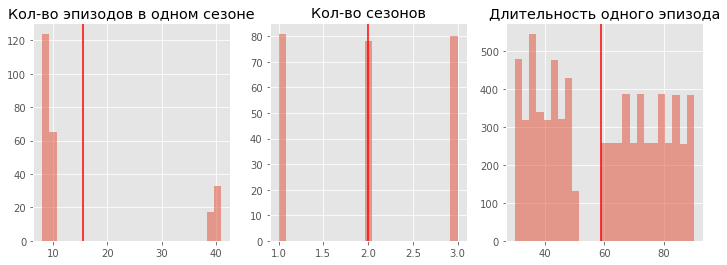

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].hist(df_avg_eps_by_season['avg_eps'], alpha = .5, bins=25)
ax[0].axvline(df_avg_eps_by_season['avg_eps'].mean(), color = 'red')
ax[0].set_title('Кол-во эпизодов в одном сезоне')

ax[1].hist(df_by_title['cnt_season'], alpha = .5, bins=25)
ax[1].axvline(df_by_title['cnt_season'].mean(), color = 'red')
ax[1].set_title('Кол-во сезонов')

ax[2].hist(df['len_min'], alpha = .5, bins=25)
ax[2].axvline(df['len_min'].mean(), color = 'red')
ax[2].set_title('Длительность одного эпизода')

plt.show()

К сожалению, полученные эмпирические распределения количества эпизодов и длительности одного эпизода не похожи ни на равномерное, ни на нормальное распределение внешне. Поэтому предсказать длительность случайного нового сериала по имеющимся данным сложно.

На равномерное распределение похожа лишь гистограмма количества сезонов. Получается, что все сериалы почти поровну поделены между одним, двумя и тремя сезонами.

Обратим внимание, что страна-производитель определяется по первой цифре идентификатора. Единица означает Россию, а двойка - Турцию.

Проведём сегментацию выборки по странам-производителям.

In [37]:
df_avg_eps_by_season['country'] = np.where(df_avg_eps_by_season['id_title_series'].astype('str').str[0]=='1', 'Russia', 'Turkey')
df_by_title['country'] = np.where(df_by_title['id_title_series'].astype('str').str[0]=='1', 'Russia', 'Turkey')
df['country'] = np.where(df['id_title_series'].astype('str').str[0]=='1', 'Russia', 'Turkey')



**Посмотрим результаты по России**

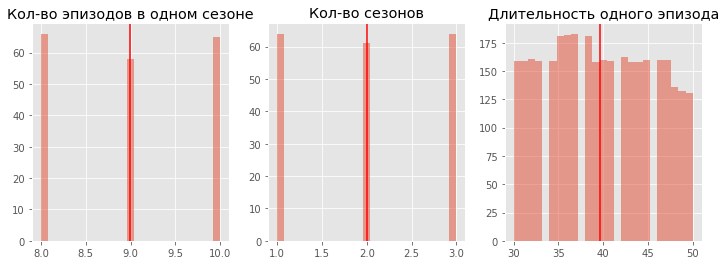

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].hist(df_avg_eps_by_season[df_avg_eps_by_season['country']=='Russia']['avg_eps'], alpha = .5, bins=25)
ax[0].axvline(df_avg_eps_by_season[df_avg_eps_by_season['country']=='Russia']['avg_eps'].mean(), color = 'red')
ax[0].set_title('Кол-во эпизодов в одном сезоне')

ax[1].hist(df_by_title[df_by_title['country']=='Russia']['cnt_season'], alpha = .5, bins=25)
ax[1].axvline(df_by_title[df_by_title['country']=='Russia']['cnt_season'].mean(), color = 'red')
ax[1].set_title('Кол-во сезонов')

ax[2].hist(df[df['country']=='Russia']['len_min'], alpha = .5, bins=25)
ax[2].axvline(df[df['country']=='Russia']['len_min'].mean(), color = 'red')
ax[2].set_title('Длительность одного эпизода')

plt.show()


Предположим, что для российского сегмента все три показателя распределены равномерно.

In [39]:
a_cnt_season_r = df_by_title[df_by_title['country']=='Russia']['cnt_season'].min()
b_cnt_season_r = df_by_title[df_by_title['country']=='Russia']['cnt_season'].max()
avg_cnt_season_r = (a_cnt_season_r + b_cnt_season_r)/2

a_avg_eps_r = df_avg_eps_by_season[df_avg_eps_by_season['country']=='Russia']['avg_eps'].min()
b_avg_eps_r = df_avg_eps_by_season[df_avg_eps_by_season['country']=='Russia']['avg_eps'].max()
avg_eps_r = (a_avg_eps_r + b_avg_eps_r)/2

a_len_r = df[df['country']=='Russia']['len_min'].min()
b_len_r = df[df['country']=='Russia']['len_min'].max()
avg_len_r = (a_len_r + b_len_r)/2

print("Кол-во сезонов в рос.сериалах распределено равномерно между",a_cnt_season_r," и ",b_cnt_season_r)
print("Среднее кол-во сезонов в рос.сериалах составляет ", avg_cnt_season_r)
print()
print("Кол-во серий в 1 сезоне в рос.сериалах распределено равномерно между",a_avg_eps_r," и ",b_avg_eps_r)
print("Среднее кол-во серий в 1 сезоне в рос.сериалах составляет ", avg_eps_r)
print()
print("Длительность серии в рос.сериалах распределено равномерно между",a_len_r," и ",b_len_r)
print("Средняя длительность серии в рос.сериалах составляет ", avg_len_r)

Кол-во сезонов в рос.сериалах распределено равномерно между 1.0  и  3.0
Среднее кол-во сезонов в рос.сериалах составляет  2.0

Кол-во серий в 1 сезоне в рос.сериалах распределено равномерно между 8.0  и  10.0
Среднее кол-во серий в 1 сезоне в рос.сериалах составляет  9.0

Длительность серии в рос.сериалах распределено равномерно между 30.0  и  50.0
Средняя длительность серии в рос.сериалах составляет  40.0


**Посмотрим результаты по Турции**

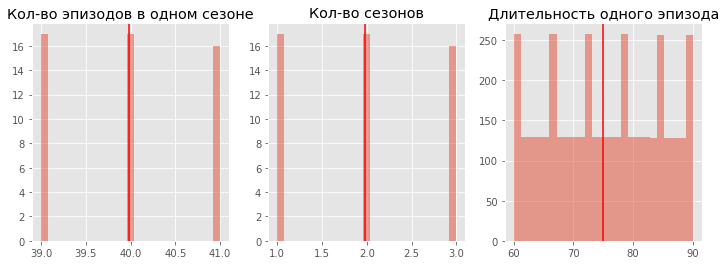

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].hist(df_avg_eps_by_season[df_avg_eps_by_season['country']=='Turkey']['avg_eps'], alpha = .5, bins=25)
ax[0].axvline(df_avg_eps_by_season[df_avg_eps_by_season['country']=='Turkey']['avg_eps'].mean(), color = 'red')
ax[0].set_title('Кол-во эпизодов в одном сезоне')

ax[1].hist(df_by_title[df_by_title['country']=='Turkey']['cnt_season'], alpha = .5, bins=25)
ax[1].axvline(df_by_title[df_by_title['country']=='Turkey']['cnt_season'].mean(), color = 'red')
ax[1].set_title('Кол-во сезонов')

ax[2].hist(df[df['country']=='Turkey']['len_min'], alpha = .5, bins=25)
ax[2].axvline(df[df['country']=='Turkey']['len_min'].mean(), color = 'red')
ax[2].set_title('Длительность одного эпизода')

plt.show()


Предположим, что для турецкого сегмента все три показателя распределены равномерно.

In [41]:
a_cnt_season_t = df_by_title[df_by_title['country']=='Turkey']['cnt_season'].min()
b_cnt_season_t = df_by_title[df_by_title['country']=='Turkey']['cnt_season'].max()
avg_cnt_season_t = (a_cnt_season_t + b_cnt_season_t)/2

a_avg_eps_t = df_avg_eps_by_season[df_avg_eps_by_season['country']=='Turkey']['avg_eps'].min()
b_avg_eps_t = df_avg_eps_by_season[df_avg_eps_by_season['country']=='Turkey']['avg_eps'].max()
avg_eps_t = (a_avg_eps_t + b_avg_eps_t)/2

a_len_t = df[df['country']=='Turkey']['len_min'].min()
b_len_t = df[df['country']=='Turkey']['len_min'].max()
avg_len_t = (a_len_t + b_len_t)/2

print("Кол-во сезонов в тур.сериалах распределено равномерно между",a_cnt_season_t," и ",b_cnt_season_t)
print("Среднее кол-во сезонов в тур.сериалах составляет ", avg_cnt_season_t)
print()
print("Кол-во серий в 1 сезоне в тур.сериалах распределено равномерно между",a_avg_eps_t," и ",b_avg_eps_t)
print("Среднее кол-во серий в 1 сезоне в тур.сериалах составляет ", avg_eps_t)
print()
print("Длительность серии в тур.сериалах распределено равномерно между",a_len_t," и ",b_len_t)
print("Средняя длительность серии в тур.сериалах составляет ", avg_len_t)



Кол-во сезонов в тур.сериалах распределено равномерно между 1.0  и  3.0
Среднее кол-во сезонов в тур.сериалах составляет  2.0

Кол-во серий в 1 сезоне в тур.сериалах распределено равномерно между 39.0  и  41.0
Среднее кол-во серий в 1 сезоне в тур.сериалах составляет  40.0

Длительность серии в тур.сериалах распределено равномерно между 60.0  и  90.0
Средняя длительность серии в тур.сериалах составляет  75.0


In [42]:
print(avg_cnt_season_r * avg_eps_r * avg_len_r)
print(avg_cnt_season_t * avg_eps_t * avg_len_t)

720.0
6000.0


После сегментации видим, что в рамках каждого сегмента количество эпизодов и количество сезонов имеют распределение, близкое к равномерному, а длительность одного эпизода имеет распределение, отдалённо напоминающее нормальное.

Таким образом, ответ на изначальный вопрос будет сильно зависеть от страны-производителя сериала-новинки.

Если производители выложили сразу все сезоны, то:
  - Если сериал российский, то его длительность равна $9 \cdot 2 \cdot 40 = 720$.
  - Если сериал турецкий, то его длительность равна $40 \cdot 2 \cdot 75 = 6000$.

Получается, что российский сериал вполне можно осилить за выходные, а вот для турецкого потребуются не одни выходные.


## Распределение Бернулли и биномиальное распределение


### Распределение Бернулли

*Распределение монетки* - распределение, которое используется для моделирования **одного** эксеримента, в котором возможны два исхода ($0$ - неудача, $1$ - успех), и успех обладает некоторой вероятностью $p$.

Основные формулы для распределения Бернулли:
 $$E(X) = p$$
 $$\text{Var}(X) = p(1-p)$$

**Распределение Бернулли в реальной жизни**

* Подбрасывание монетки, где $1$ - орёл, а $0$ - решка (или наоборот)
* Покупка на сайте одним клиентом

### Биномиальное распределение

**Биномиальное распределение** представляет собой сумму случайных величин, каждая из которых имеет **распределение Бернулли**.

То есть каждая случайная величина в сумме принимает значение $1$ или $0$ с вероятностью *p*.

Таким образом, биномиальное распределение принимает возможные значения от $0$ до $n$, где $n$ — количество суммируемых случайных величин.

Основные формулы для биномиального распределения:

 $$X \sim Bin(n,p)$$
 $$E(X) = np$$
 $$\text{Var}(X) = np(1-p)$$

Значение вероятности в точке $k \in \{0,1,2, \dots , n\}$ имеет следующий вид:

$$\\p_k = C^{k}_{n}p^{k}q^{n-k}, \text{ где }q=1-p$$

 **Биномиальное распределение в реальной жизни**

* Кол-во спам звонков/писем в день
* Возвраты покупок в неделю
* Кол-во мощенических транзакций в день
* Любой процесс который можно закодировать на успех/не успех в одном эксперименте

### Задача на подумать

**Сфера**

Фудтех (доставка продуктов из физических магазинов)  

**Вопрос**

В каких заказах средняя оценка удовлетворенности заказом будет ниже в маленьких или в больших?

### Задача 1. Сдача экзамена

Какова вероятность сдать тест по статистике из 6 вопросов путем случайного угадывания из двух вариантов. Тест засчитывается если студент дал не менее 5 ответов.

Формула которая потребуется для решения:

$$f(k)= C^{k}_{n}  \cdot p^{k}  \cdot q^{n-k}$$


Искомая вероятность это сумма двух событий:

$$P(A) = f(5) + f(6) = C^{5}_{6} \cdot 0.5^{5}  \cdot 0.5^{6-5} + C^{6}_{6} \cdot 0.5^{6} \cdot 0.5^{6-6}$$


Найдем значения биномиальных коэффициентов:

 - $C^{5}_{6} = \frac{6!}{5! \cdot (6 - 5)!} = 6$
 - $C^{6}_{6} = 1$

Возведем вероятности в нужные степени:
 - $0.5^{5}  \cdot 0.5^{1} = 0.015625$
 - $0.5^{6}  \cdot 0.5^{0} = 0.015625$

Сложим вероятности двух событий:
$$6  \cdot 0.015625 + 1  \cdot 0.015625 = 0.109375$$

**То же самое решим в Python**

In [43]:
### Зададим параметры
n = 6
p = 0.5

In [44]:
exp_bin = round(n * p, 2)
print('Среднее равно', exp_bin)

std_bin = round((n * p * (1 - p)) ** .5, 2)
print('Сигма равна', std_bin)

Среднее равно 3.0
Сигма равна 1.22


In [45]:
from scipy.stats import binom
import numpy as np

x = np.arange(0, n + 1)

binomial_pmf = binom.pmf(x, n, p) ### Функция плотности
binomial_cdf = binom.cdf(x, n, p) ### Функция распределения

Построим функцию плотности биномиального распределения.

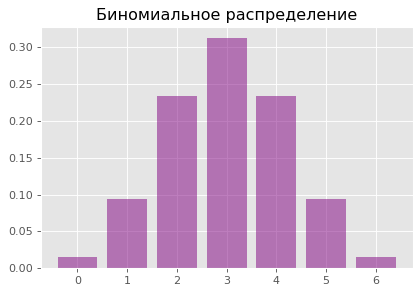

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(6, 4), dpi=80)
plt.bar(x, binomial_pmf, color = 'purple', alpha = .5)
plt.title('Биномиальное распределение')
plt.show()

In [47]:
print(binomial_pmf)
print(f' P(A) = {np.sum(binomial_pmf[-2:])}')

[0.015625 0.09375  0.234375 0.3125   0.234375 0.09375  0.015625]
 P(A) = 0.10937500000000003


### Задача 2. Банковский сектор

В стране Х банковский сектор представлен тремя секторами: потребительский, промышленный и ипотечный. В потребительском секторе 44 банка, а в ипотечном и промышленном – по 32 банка.

  1. Вероятность дефолта банка из **потребительского** сектора составляет 12%. **Потребительский** сектор «испытает дефолт», если из 44 банков останется строго меньше 36.
  2. Вероятность дефолта банка из **промышленного** сектора составляет 8%. **Промышленный** сектор «испытает дефолт», если из 32 банков останется строго меньше 27.
  3. Вероятность дефолта банка из **ипотечного** сектора составляет 10%. **Ипотечный** сектор «испытает дефолт», если из 32 банков останется строго меньше 26.

Банковская система страны Х выдержит кризис, если в рамках этого кризиса осталось хотя бы два банковских сегмента из 3.

In [18]:
n_cust = 44
p_cust = .12
k_cust = 36 #порог для банков которые должны остаться
thr_cust = 1 - k_cust / n_cust

cnt_def_cust = round(n_cust * p_cust)

print("Граница дефолта потреб. банков =", thr_cust)
print("Допустимое кол-во потреб. банков с дефолтом =", n_cust - k_cust)

print("Ожидаемое кол-во дефолтных потреб. банков =", cnt_def_cust)

Граница дефолта потреб. банков = 0.18181818181818177
Допустимое кол-во потреб. банков с дефолтом = 8
Ожидаемое кол-во дефолтных потреб. банков = 5


In [19]:
n_ind = 32
p_ind = .08
k_ind = 27
thr_ind = 1 - k_ind / n_ind

cnt_def_ind = round(n_ind * p_ind)

print("Граница дефолта промышл. банков =", thr_ind)
print("Допустимое кол-во промышл. банков с дефолтом =", n_ind - k_ind)

print("Ожидаемое кол-во дефолтных промышл. банков =", cnt_def_ind)

Граница дефолта промышл. банков = 0.15625
Допустимое кол-во промышл. банков с дефолтом = 5
Ожидаемое кол-во дефолтных промышл. банков = 3


In [20]:
n_mort = 32
p_mort = .1
k_mort = 26
thr_mort = 1 - k_mort / n_mort

cnt_def_mort = round(n_mort * p_mort)

print("Граница дефолта ипот. банков =", thr_mort)
print("Допустимое кол-во ипот. банков с дефолтом =", n_mort - k_mort)

print("Ожидаемое кол-во дефолтных ипот. банков =", cnt_def_mort)

Граница дефолта ипот. банков = 0.1875
Допустимое кол-во ипот. банков с дефолтом = 6
Ожидаемое кол-во дефолтных ипот. банков = 3


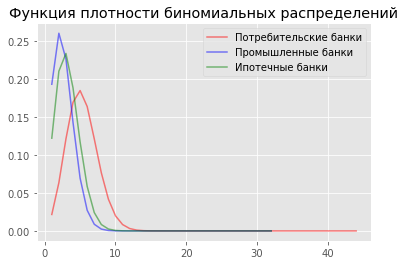

In [51]:
x_cust = np.arange(1, n_cust+1)
x_ind = np.arange(1, n_ind+1)
x_mort = np.arange(1, n_mort+1)

pmf_cust = binom.pmf(k=x_cust, n=n_cust, p=p_cust)
pmf_ind = binom.pmf(k=x_ind, n=n_ind, p = p_ind)
pmf_mort = binom.pmf(k=x_mort, n=n_mort, p=p_mort)

plt.plot(x_cust, pmf_cust, color='red',   alpha=.5, label='Потребительские банки')
plt.plot(x_ind, pmf_ind,  color='blue',  alpha=.5, label='Промышленные банки')
plt.plot(x_mort, pmf_mort, color='green', alpha=.5, label='Ипотечные банки')
plt.title("Функция плотности биномиальных распределений")
plt.legend(loc='upper right')
plt.show()

In [52]:
# Вероятности для каждого сектора, что в нем будет допустимое кол-во банков с дефолтом
p_ndef_cust = binom.cdf(k=n_cust-k_cust, n=n_cust, p=p_cust)
p_ndef_ind  = binom.cdf(k=n_ind-k_ind,   n=n_ind,  p=p_ind )
p_ndef_mort = binom.cdf(k=n_mort-k_mort, n=n_mort, p=p_mort)

p_def_cust = 1 - p_ndef_cust
p_def_ind  = 1 - p_ndef_ind
p_def_mort = 1 - p_ndef_mort

print("Вероятность дефолта потребительского сектора =", p_def_cust)
print("Вероятность дефолта промышленного сектора =", p_def_ind)
print("Вероятность дефолта ипотечного сектора =", p_def_mort)

Вероятность дефолта потребительского сектора = 0.07462444050339123
Вероятность дефолта промышленного сектора = 0.039030013154306875
Вероятность дефолта ипотечного сектора = 0.035848867118464356


In [53]:
p_country_dies  = p_def_cust * p_def_ind * p_def_mort # вероятность всех секторов уйти в дефолт
p_cust_ind_d = p_def_cust * p_def_ind * p_ndef_mort # вероятность что останется только ипотечный
p_cust_mort_d = p_def_cust * p_def_mort * p_ndef_ind # вероятность что останется только промышленный
p_ind_mort_d = p_def_cust * p_def_mort * p_ndef_cust # вероятность что останется только потребительский

negative_scenario = (p_country_dies + p_cust_ind_d + p_cust_mort_d + p_ind_mort_d)
p_country_lives = 1 - negative_scenario

print("Вероятность дефолта страны =", negative_scenario)
print("Вероятность выживания страны =", p_country_lives)

Вероятность дефолта страны = 0.00795894761515823
Вероятность выживания страны = 0.9920410523848417


### Задача 3. Оценка клиентского потока

Определи необходимое для привлечения количество клиентов, чтобы с вероятностью минимум 95% получить минимум 120 оплат. Конверсия из привлечения в оплату составляет 12%.

In [ ]:
### Если возьмём 1000 клиентов, то ожидаемым средним будет 120 оплат.
N = 1000
p = .12

print(N * p)

120.0


Однако обратим внимание, что 120 и больше оплат мы получим с вероятностью меньше, чем 95%.

In [ ]:
print(1 - binom.cdf(119, N, p))

0.5144920297931765


In [ ]:
x = np.arange(0, N + 1)

probs_cdf = binom.cdf(x, N, p)
probs_ppf = binom.pmf(x, N, p)

Изобразим функцию распределения и функцию плотности биномиального распределения на графиках.

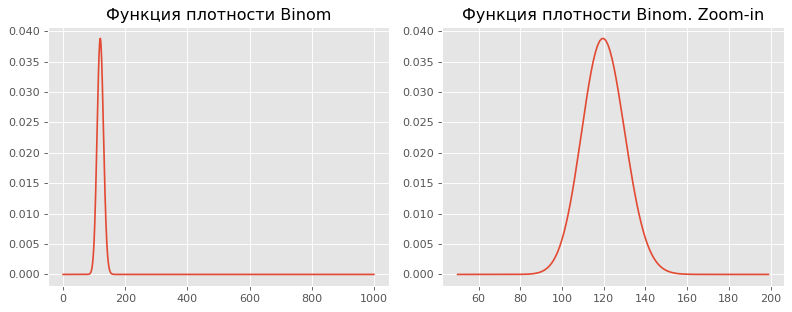

In [ ]:
figure(figsize=(10, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.plot(range(0, N + 1), probs_ppf)
plt.title('Функция плотности Binom')

plt.subplot(1, 2, 2)
plt.plot(range(0, N + 1)[50:200], probs_ppf[50:200])
plt.title('Функция плотности Binom. Zoom-in')
plt.tight_layout()

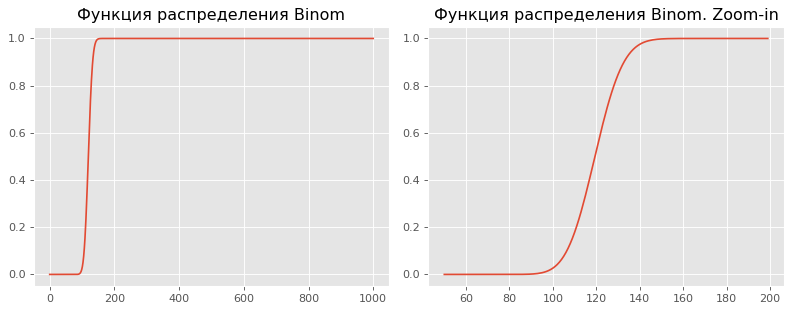

In [ ]:
figure(figsize=(10, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.plot(range(0, N + 1), probs_cdf)
plt.title('Функция распределения Binom')

plt.subplot(1, 2, 2)
plt.plot(range(0, N + 1)[50:200], probs_cdf[50:200])
plt.title('Функция распределения Binom. Zoom-in')
plt.tight_layout()

Теперь численным методом найдём количество наблюдений, при котором кумулятивная вероятность достигает 95%.

In [ ]:
N_new = 1020

print(1 - binom.cdf(119, N_new, p))

0.605690747797837


In [ ]:
N_new = 1040

print(1 - binom.cdf(119, N_new, p))

0.6902903776567125


In [ ]:
pwh = 0
thresh = .95

k = 119
N_new = 1040

while pwh < thresh:
  pwh = 1 - binom.cdf(k, N_new, p) ### Вероятность получить 120 оплат и более
  N_new += 5
  print(pwh, N_new)

print(f'\nНеобходимое количество клиентов для привлечения: {N_new}')

0.6902903776567125 1045
0.7099808898940906 1050
0.7290005032835816 1055
0.7473159787155137 1060
0.7649000701338668 1065
0.7817314637390549 1070
0.7977946468778955 1075
0.8130797132233847 1080
0.8275821115536024 1085
0.8413023459353997 1090
0.8542456354094107 1095
0.8664215413684777 1100
0.8778435707376057 1105
0.8885287628171142 1110
0.8984972672635106 1115
0.9077719201768395 1120
0.916377824662177 1125
0.9243419415604419 1130
0.9316926953221165 1135
0.938459599248919 1140
0.9446729035727961 1145
0.9503632690965957 1150

Необходимое количество клиентов для привлечения: 1150


## Распределение Пуассона

**Распределение Пуассона** — распределение дискретной случайной величины, которая показывает количество событий, произошедших за период времени.

Функция плотности распределения Пуассона в точке $k$ показывает вероятность того, что количество событий за период времени будет равно $k$.

$$P(X=k)=\frac{e^{-\lambda} \lambda^k}{k!}$$
$$k = \{0, 1, 2, ...\}$$

**Распределение Пуассона в реальной жизни**

* Количество заявлений о банкротстве в месяц
* Количество посетителей веб-сайта в час
* Количество вызовов в час в колл-центре

In [ ]:
lambda_v = 5

mean_poisson = lambda_v
var_poisson  = lambda_v

print("Среднее = ", mean_poisson)
print("Дисперсия = ", var_poisson)
print("Стандартное отклонение = ", var_poisson ** .5)

Среднее =  5
Дисперсия =  5
Стандартное отклонение =  2.23606797749979


In [ ]:
p_100   = np.random.poisson(lambda_v, 100)
p_1000  = np.random.poisson(lambda_v, 1000)
p_10000 = np.random.poisson(lambda_v, 10000)

In [ ]:
print(np.mean(p_100))
print(np.mean(p_1000))
print(np.mean(p_10000))

5.45
5.047
4.9947


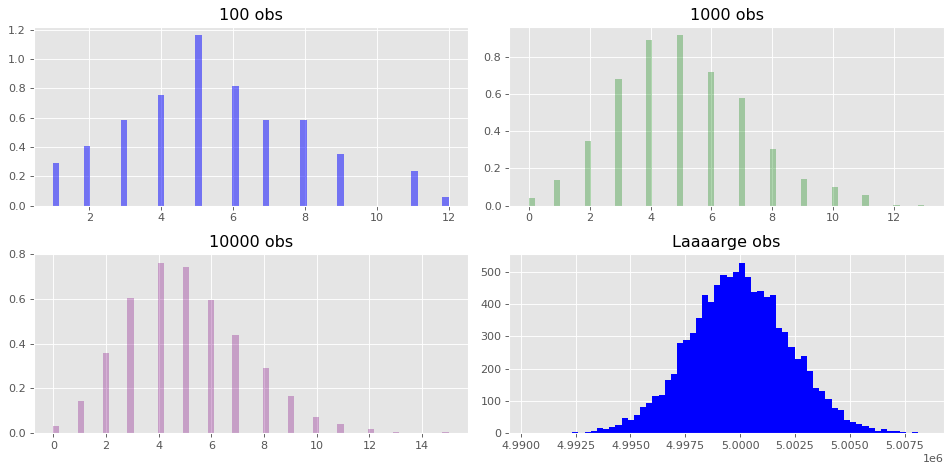

In [ ]:
# Как меняется распределение с ростом числа наблюдений
plt.figure(figsize=(12, 6), dpi=80)

plt.subplot(2, 2, 1)
plt.hist(p_100, color='blue', bins=64, alpha = .5, density = True)
plt.title('100 obs')

plt.subplot(2, 2, 2)
plt.hist(p_1000, color='green', bins=64, alpha = .3, density = True)
plt.title('1000 obs')

plt.subplot(2, 2, 3)
plt.hist(p_10000, color='purple', bins=64, alpha = .3, density = True)
plt.title('10000 obs')

p_100_n = np.random.poisson(5000000, 10000)
plt.subplot(2, 2, 4)
plt.hist(p_100_n, bins=64, color='blue')
_ = plt.title('Laaaarge obs')

plt.tight_layout()

### Задача 1. Нагрузка на сервер

В минуту в среднем сервер обрабатывает 125 пользователей. Если количество пользователей превысит 160, начнутся технические проблемы с сервером. Какова вероятность того, что начнутся проблемы с сервером?

In [ ]:
lambda_v = 125

In [ ]:
from scipy.stats import poisson

rv = poisson(lambda_v)

In [ ]:
n_limit = lambda_v * 2
x_poisson = np.arange(0, n_limit + 1)

dens_func_poisson = rv.pmf(x_poisson)
distr_func_poisson = rv.cdf(x_poisson)

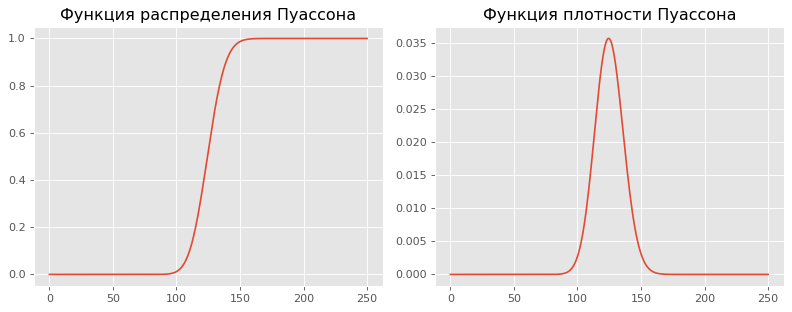

In [ ]:
figure(figsize=(10, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.plot(x_poisson, distr_func_poisson)
plt.title('Функция распределения Пуассона')

plt.subplot(1, 2, 2)
plt.plot(x_poisson, dens_func_poisson)
plt.title('Функция плотности Пуассона')
plt.tight_layout()

In [ ]:
figure(figsize=(6, 4), dpi=80)

plt.show()

<Figure size 480x320 with 0 Axes>

Ответ, какова вероятность что начнутся проблемы с сервером.

In [ ]:
1 - rv.cdf(160)

0.0011267141837993933

Какова вероятность, что за один период времени мы получим между 120 и 130 пользователей за одну минуту?

In [ ]:
cum_prob_120 = rv.cdf(120)
cum_prob_130 = rv.cdf(130)

print(cum_prob_120)
print(cum_prob_130)

0.34829364979010974
0.6925900081993908


In [ ]:
print(cum_prob_130 - cum_prob_120)

### Вероятность равна 34.4%

0.344296358409281


## Экспоненицальное распределение

**Экспоненицальное распределение** — непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

**Функция плотности** в точке х при параметре $\lambda$ составляет:

$$f_{exp}(x) = \lambda \cdot e ^ {-\lambda x}, \hspace{0.5 cm} x \ge 0$$

**Функция распределения** в точке х при параметре $\lambda$ составляет:

$$F_{exp}(x) = 1 - e ^ {-\lambda x}$$

**Мат. ожидание** и **дисперсия** экспоненциального распределения составляют:

$$E(X) = \frac{1}{\lambda}$$
$$Var(X) = \frac{1}{\lambda^2}$$

Тогда
$$\sigma_X = \sqrt{Var(X)} = \frac{1}{\lambda} = E(X)$$

*Обрати внимание: область определения этого распределения — положительная полуось.*

**Экспоненицальное распределение в реальной жизни**

* Время до совершения первой покупки
* Время отклика на пуш уведомления


### Задача 1: Колл-центр банка.
Какова вероятность, что со следующим клиентом банковский сотрудник справится меньше, чем за 4 минуты?
Если предположить, что в среднем один сотрудник тратит 7 минут на одного клиента.

Случайная величина *X* показывает, сколько минут один сотрудник банка потратил на одного клиента. Пусть *Х* — непрерывная случайная величина, которая имеет экспоненицальное распределение.

In [ ]:
#### Для этого нам необходимо рассчитать значение функции распределения экспоненциального распределения в точке 4
#### (!) при условии, что лямбда = 1/7

from scipy.stats import expon

In [ ]:
### Среднее

m = 7

### Лямбда

lamb = 1 / m
print(lamb)

0.14285714285714285


In [ ]:
rv_exp = expon(m)

In [ ]:
import numpy as np

x = np.arange(0, m + 20, 0.01)
exp_pdf = rv_exp.pdf(x)
exp_cdf = rv_exp.cdf(x)

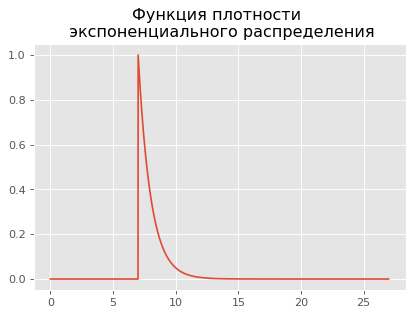

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(6, 4), dpi=80)
plt.plot(x, exp_pdf)
plt.title('Функция плотности \n экспоненциального распределения')
plt.show()

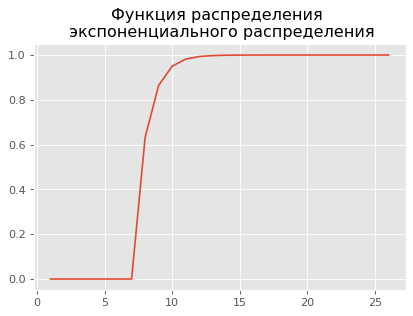

In [ ]:
figure(figsize=(6, 4), dpi=80)
plt.plot(x, exp_cdf)
plt.title('Функция распределения \n экспоненциального распределения')
plt.show()

In [ ]:
rv_exp = expon(scale = m)

In [ ]:
rv_exp.cdf(4)

0.4352818779922407

In [ ]:
rv_exp_line = expon(15)
print(1 - rv_exp_line.cdf(20))

0.006737946999085476


*Обратите внимание:*


- **Распределение Пуассона** измеряется в *событиях за период времени*.
- **Экспоненциальное распределение** измеряется в *единицах времени*.


## **Дополнительные ссылки**

- Ссылка на калькулятор распределений: https://gallery.shinyapps.io/dist_calc/

- Соотношение между экспоненциальным распределением и распределением Пуассона: https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution

- Еще полезная ссылка по экспоненциальному распределению: https://www.statology.org/exponential-distribution-python/